In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

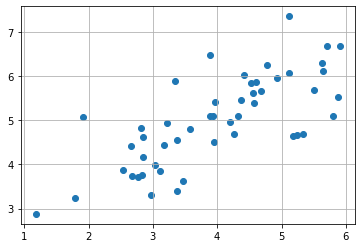

In [2]:
data=loadmat(r"C:\Users\Eduardo\Documents\CARRERA\Udemy\Machine_learning_stanford\datasets\ex7data1.mat")
X=data["X"]
plt.scatter(X[:,0],X[:,1]) #visualization
plt.grid()
plt.show()

In [3]:
# in order to apply  PCA we first have to normalize the date by substracting the mean xj - uj
def mean(X):
    U=[]
    m=X.shape[0]
    for i in range(0, X.shape[1]):
        u=X[:,i].sum(axis=0)
        u=u/m
        U.append(u)
    return U

def covariance_matrix(X):
    m=X.shape[0]
    sigma =(1/m)*X.T.dot(X)
    return sigma

def standarization(data):
    data=data.astype('float64')
    for i in range(0,data.shape[1]): 
        x=data[:,i]
        # calculating mean
        mean=0
        n=len(x)
        for j in range(0,n):
            mean += x[j]
        mean= mean/n

        #calculating standard deviation
        sdv=0
        for j in range(0,n):
            sdv += (x[j]-mean)**2
        sdv=np.sqrt(sdv/n)

        #calculating standarization
        x_stand=np.zeros(n)
        for j in range(0,n):
            data[j,i] =float((data[j,i]-mean)/sdv)
    return data
    
        

### 1 step: Mean nomalization

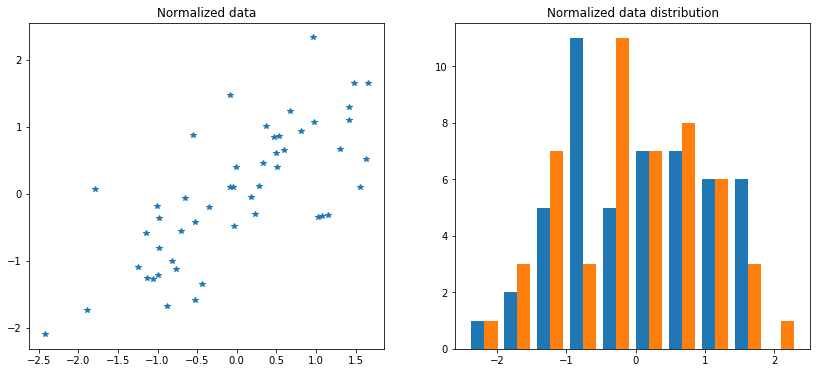

In [4]:
Xnn=standarization(X)

fig1, (ax1,ax2)= plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax1.set_title("Normalized data")
ax1.plot(Xnn[:,0],Xnn[:,1],"*")

ax2.set_title("Normalized data distribution")
ax2.hist(Xnn)
plt.show()

## 2 step: Compute covariance matri and use svd decomposition

In [36]:
sigman =  covariance_matrix(Xnn)
u, S, v= np.linalg.svd(sigman, full_matrices=True)

## 3 step: Colapse the  data into a lesser damation in the form of z (in this case a vector)

In [6]:
k=1
z= np.zeros((X.shape[0],k))
for i in range(0,X.shape[0]):
    uk = u[:,k-1]
    x=Xnn[i,:]
    z[i]=x.dot(uk)
#z

## 4 step: using Z recompute the values into the original dimension, see that difference

In [7]:
Xrec= np.zeros((z.shape[0],u.shape[0]))
for i in range(0,z.shape[0]):
    v = z[i,:].T
    Xrec[i]=v*u[:,k-1]
#Xrec

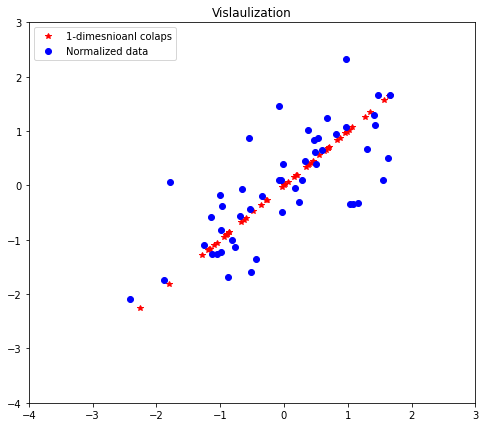

In [8]:
fig2, (ax1)= plt.subplots(nrows=1, ncols=1, figsize=(8,7))  
ax1.plot(Xrec[:,0],Xrec[:,1],"r*", label="1-dimesnioanl colaps")
ax1.plot(Xnn[:,0],Xnn[:,1],"bo", label="Normalized data")
ax1.set_xlim(-4,3)
ax1.set_ylim(-4,3)
ax1.set_title("Vislaulization")
ax1.legend()
plt.show()

### Testing if (Xnn-Xrec)**2/(xnn) <= 0.01

In [44]:
m=Xnn.shape[0]
s=(1/m)*np.sqrt(((Xnn-Xrec)**2).sum())
ss=(1/m)*np.sqrt(((Xnn)**2).sum())
test=s/ss
if test <= 0.01:
    print("true: it is okay to decompose into those K dimensions, tesst:",test)
else:
    print("false: decomposing into this k dimenssion losses a lot of inforamtion, test:",test)
    # for some reason this test does not work

false: decomposing into this k dimenssion losses a lot of inforamtion, test: 0.3636410480547201


In [45]:
K=1
a=0
b=0
for i in range(0,K):
    a+=S[i]
for j in range(0,X.shape[1]):
    b+=S[j]
test2=1-(a/b)
test2

0.13223481183033514

In [47]:
print("Variance retained by pca in K=100:",(1-test2)*100,"%")

Variance retained by pca in K=100: 86.77651881696649 %
